<a href="https://colab.research.google.com/github/Achuan-2/Deep-Leaning/blob/main/mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 初学者的 TensorFlow 2.0 教程

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://tensorflow.google.cn/tutorials/quickstart/beginner"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png" />在 TensorFlow.org 观看</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/quickstart/beginner.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png" />在 Google Colab 运行</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/quickstart/beginner.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png" />在 GitHub 查看源代码</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/tutorials/quickstart/beginner.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png" />下载笔记本</a>
  </td>
</table>

Note: 我们的 TensorFlow 社区翻译了这些文档。因为社区翻译是尽力而为， 所以无法保证它们是最准确的，并且反映了最新的
[官方英文文档](https://tensorflow.google.cn/?hl=en)。如果您有改进此翻译的建议， 请提交 pull request 到
[tensorflow/docs](https://github.com/tensorflow/docs) GitHub 仓库。要志愿地撰写或者审核译文，请加入
[docs-zh-cn@tensorflow.org Google Group](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-zh-cn)。

这是一个 [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) 笔记本文件。 Python程序可以直接在浏览器中运行，这是学习 Tensorflow 的绝佳方式。想要学习该教程，请点击此页面顶部的按钮，在Google Colab中运行笔记本。

1. 在 Colab中, 连接到Python运行环境： 在菜单条的右上方, 选择 *CONNECT*。
2. 运行所有的代码块: 选择 *Runtime* > *Run all*。

下载并安装 TensorFlow 2.0 测试版包。将 TensorFlow 载入你的程序：

In [2]:
# 安装 TensorFlow
# 导入包
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


载入并准备好 [MNIST 数据集](http://yann.lecun.com/exdb/mnist/)。将样本从整数转换为浮点数：

In [3]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels)= mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [9]:
train_labels[0]

5

In [10]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

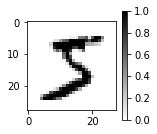

In [11]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

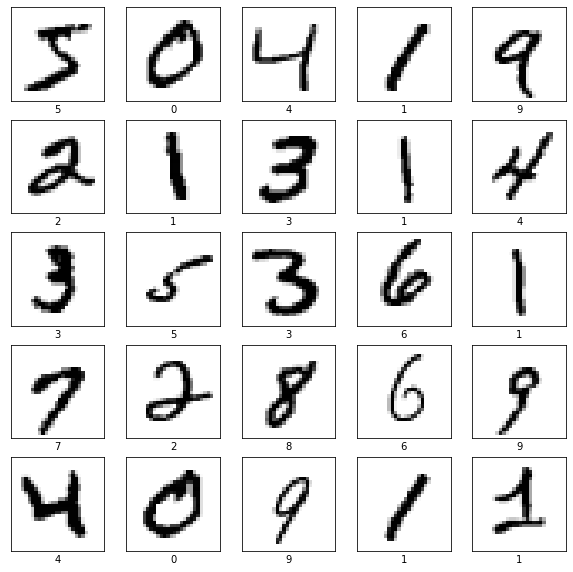

In [14]:
#显示训练集中的前 25 个图像，并在每个图像下方显示类名称。
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # plt.imshow(train_images[i], cmap=plt.cm.ocean)
    plt.xlabel(train_labels[i])
plt.show()

将模型的各层堆叠起来，以搭建 `tf.keras.Sequential` 模型。为训练选择优化器和损失函数：

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

训练并验证模型：

In [17]:
model.fit(train_images, train_labels, epochs=5)

model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4940 - accuracy: 0.8537
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1502 - accuracy: 0.9558
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1069 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0874 - accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0740 - accuracy: 0.9771
313/313 - 0s - loss: 0.0727 - accuracy: 0.9778


[0.07267259806394577, 0.9778000116348267]

现在，这个照片分类器的准确度已经达到 98%。想要了解更多，请阅读 [TensorFlow 教程](https://tensorflow.google.cn/tutorials/)。

In [18]:
# 如果直接进行预测
predictions = model.predict(test_images)
predictions[0]

array([6.09453599e-09, 5.94398142e-10, 1.27331605e-05, 2.87097704e-04,
       1.32719695e-11, 3.67420014e-08, 2.47634931e-15, 9.99699950e-01,
       7.12439219e-09, 2.88770394e-07], dtype=float32)

In [19]:
# 在原有模型基础上附加一个 softmax 层，将 logits 转换成更容易理解的概率。
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([0.08534048, 0.08534048, 0.08534158, 0.085365  , 0.08534048,
       0.08534049, 0.08534048, 0.2319099 , 0.08534048, 0.08534051],
      dtype=float32)

In [20]:
np.argmax(predictions[0])

7

In [21]:
# 图片绘制函数
def plot_image(i, predictions_array, label_array, img_array):
  predictions_array, true_label, img = predictions_array[i], label_array[i], img_array[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

# 概率绘制
def plot_value_array(i, predictions_array, label_array):
  predictions_array, true_label = predictions_array[i], label_array[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

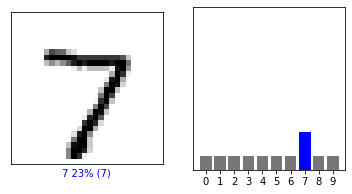

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

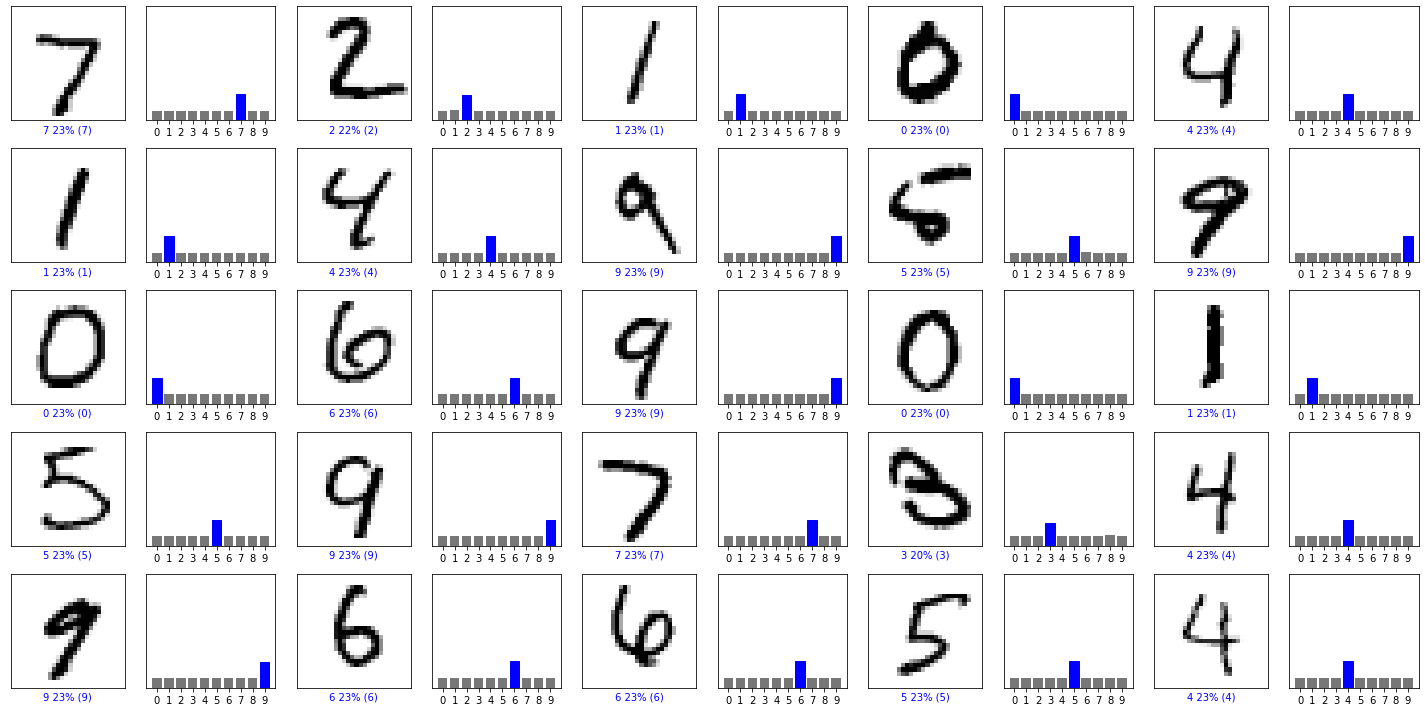

In [23]:
# 预测结果可视化
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()

In [24]:
# 直接分析结果函数
def predict_result(i, predictions_array, label_array, img_array,right_array,error_array):
    predictions_array, true_label, img = predictions_array[i], label_array[i], img_array[i]
    predicted_label = np.argmax(predictions_array)
    message="序号{}\t 预测为{}\t概率{:2.0f}%\t实际是 ({})".format(i,predicted_label,
                                100*np.max(predictions_array),true_label)

    if predicted_label == true_label:
        print(message,"\t预测成功！")
        right_array.append(message)
    else:
        print(message,"\t预测失败！")
        error_array.append(message)

right_array=[]
error_array=[]
num_images=10000
for i in range(num_images):
    predict_result(i, predictions, test_labels, test_images,right_array,error_array)

流式输出内容被截断，只能显示最后 5000 行内容。
序号5000	 预测为3	概率23%	实际是 (3) 	预测成功！
序号5001	 预测为9	概率23%	实际是 (9) 	预测成功！
序号5002	 预测为9	概率23%	实际是 (9) 	预测成功！
序号5003	 预测为8	概率23%	实际是 (8) 	预测成功！
序号5004	 预测为4	概率23%	实际是 (4) 	预测成功！
序号5005	 预测为1	概率23%	实际是 (1) 	预测成功！
序号5006	 预测为0	概率23%	实际是 (0) 	预测成功！
序号5007	 预测为6	概率23%	实际是 (6) 	预测成功！
序号5008	 预测为0	概率23%	实际是 (0) 	预测成功！
序号5009	 预测为9	概率23%	实际是 (9) 	预测成功！
序号5010	 预测为6	概率23%	实际是 (6) 	预测成功！
序号5011	 预测为8	概率22%	实际是 (8) 	预测成功！
序号5012	 预测为6	概率23%	实际是 (6) 	预测成功！
序号5013	 预测为1	概率23%	实际是 (1) 	预测成功！
序号5014	 预测为1	概率23%	实际是 (1) 	预测成功！
序号5015	 预测为9	概率23%	实际是 (9) 	预测成功！
序号5016	 预测为8	概率23%	实际是 (8) 	预测成功！
序号5017	 预测为9	概率23%	实际是 (9) 	预测成功！
序号5018	 预测为2	概率23%	实际是 (2) 	预测成功！
序号5019	 预测为3	概率23%	实际是 (3) 	预测成功！
序号5020	 预测为5	概率23%	实际是 (5) 	预测成功！
序号5021	 预测为5	概率23%	实际是 (5) 	预测成功！
序号5022	 预测为9	概率23%	实际是 (9) 	预测成功！
序号5023	 预测为4	概率23%	实际是 (4) 	预测成功！
序号5024	 预测为2	概率23%	实际是 (2) 	预测成功！
序号5025	 预测为1	概率23%	实际是 (1) 	预测成功！
序号5026	 预测为9	概率23%	实际是 (9) 	预测成功！
序号5027	 预测为4	概率23%	实际是 (4) 	预测成功！
序号5028	 预测为3	概率23%	实际

In [25]:
print(error_array)
print(len(error_array))

['序号115\t 预测为9\t概率15%\t实际是 (4)', '序号149\t 预测为9\t概率13%\t实际是 (2)', '序号233\t 预测为3\t概率15%\t实际是 (8)', '序号247\t 预测为6\t概率22%\t实际是 (4)', '序号259\t 预测为0\t概率15%\t实际是 (6)', '序号321\t 预测为7\t概率23%\t实际是 (2)', '序号340\t 预测为3\t概率21%\t实际是 (5)', '序号381\t 预测为7\t概率22%\t实际是 (3)', '序号445\t 预测为0\t概率15%\t实际是 (6)', '序号447\t 预测为9\t概率21%\t实际是 (4)', '序号552\t 预测为9\t概率15%\t实际是 (0)', '序号582\t 预测为2\t概率15%\t实际是 (8)', '序号610\t 预测为6\t概率16%\t实际是 (4)', '序号613\t 预测为8\t概率15%\t实际是 (2)', '序号659\t 预测为1\t概率19%\t实际是 (2)', '序号684\t 预测为3\t概率14%\t实际是 (7)', '序号691\t 预测为4\t概率19%\t实际是 (8)', '序号720\t 预测为8\t概率22%\t实际是 (5)', '序号740\t 预测为9\t概率17%\t实际是 (4)', '序号877\t 预测为5\t概率14%\t实际是 (8)', '序号947\t 预测为9\t概率23%\t实际是 (8)', '序号956\t 预测为2\t概率18%\t实际是 (1)', '序号965\t 预测为0\t概率15%\t实际是 (6)', '序号1014\t 预测为5\t概率22%\t实际是 (6)', '序号1039\t 预测为2\t概率15%\t实际是 (7)', '序号1044\t 预测为8\t概率15%\t实际是 (6)', '序号1112\t 预测为6\t概率21%\t实际是 (4)', '序号1181\t 预测为1\t概率23%\t实际是 (6)', '序号1182\t 预测为8\t概率19%\t实际是 (6)', '序号1194\t 预测为9\t概率21%\t实际是 (7)', '序号1226\t 预测为2\t概率23%\t实际是 (7)',

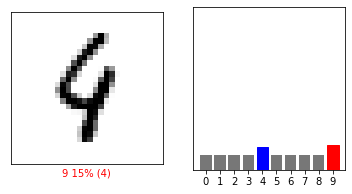

In [26]:
i = 115
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

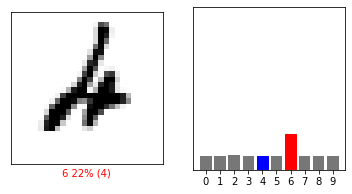

In [27]:
i = 247
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()